# Mount Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive

# Configuration

In [3]:
root_path = '/home/user01/'

In [4]:
path_lst = [
    '/home/user01/experiments/reports/',
]

# Load JSON Files

In [5]:
import json
def read_json(path):
  with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)
  return data

In [6]:
exp_prefix = '106-svm-backdoor-idea1-cutmix-0.6-cifar(0-6)'

In [7]:
import os

all_files = []
for folder in path_lst:
  files_inside_folder = os.listdir(folder)
  desired_files = [folder+item for item in files_inside_folder if item.startswith(exp_prefix)]
  all_files.extend(desired_files)

print(all_files)

['/home/user01/experiments/reports/106-svm-backdoor-idea1-cutmix-0.6-cifar(0-6)-80-modify.json', '/home/user01/experiments/reports/106-svm-backdoor-idea1-cutmix-0.6-cifar(0-6)-20-modify.json', '/home/user01/experiments/reports/106-svm-backdoor-idea1-cutmix-0.6-cifar(0-6)-60-modify.json', '/home/user01/experiments/reports/106-svm-backdoor-idea1-cutmix-0.6-cifar(0-6)-0-modify.json', '/home/user01/experiments/reports/106-svm-backdoor-idea1-cutmix-0.6-cifar(0-6)-40-modify.json']


In [8]:
contents = [read_json(file_path) for file_path in all_files]

In [9]:
contents[0]

{'root_path': '/home/user01/',
 'series_ID': 106,
 'series_desc': '\nfirst ideas to defend against attacks, having a trusted dataset\n',
 'log_path': '/home/user01/experiments/reports/106-svm-backdoor-idea1-cutmix-0.6-cifar(0-6)-80-modify.json',
 'log': {'attack': 'backdoor',
  'model': 'SVM',
  'dataset': 'CIFAR (0-6)',
  'task': 'binary classification',
  'pytorch_seed': 50,
  'numpy_seed': 50,
  'defense': 'idea1',
  'defense_combination_method': 'cutmix',
  'defense_combination_samples': 50,
  'defense_remove_based_on': 'threshold',
  'defense_threshold': 0.6,
  'num_backdoor_samples': 200,
  'method': 'modify',
  'space_dimension': 675,
  'img_width': 15,
  'img_height': 15,
  'accuracy_Test_before_defense': 0.746,
  'accuracy_Train_before_defense': 0.946530612244898,
  'attack_success_rate_test_before_defense': 1.0,
  'benign_accuracy_before_defense': 0.7326530612244898,
  'attack_success_rate_before_defense': 1.0,
  'defense_true_positive': 0.9866599546941858,
  'defense_poison_

In [10]:
def extract_info(json_dict):
  log = json_dict['log']
  base = json_dict
  return {
      'poisoning_rate':base['poisoning_rate'],
      'asr_bd':log['attack_success_rate_before_defense']*100,
      'asr':log['attack_success_rate']*100,
      'asr_test_bd':log['attack_success_rate_test_before_defense']*100,
      'asr_test':log['attack_success_rate_test']*100,
      'acc_train_bd':log['accuracy_Train_before_defense']*100,
      'acc_train':log['accuracy_Train']*100,
      'acc_test_bd':log['accuracy_Test_before_defense']*100,
      'acc_test':log['accuracy_Test']*100,
      'ba_bd':log['benign_accuracy_before_defense']*100,
      'ba':log['benign_accuracy']*100,
      'defense_true_positive':log['defense_true_positive']*100,
      'defense_poison_removal':log['defense_poison_removal']*100
  }

In [11]:
contents = [extract_info(item) for item in contents]

In [12]:
contents[0]

{'poisoning_rate': 0.8,
 'asr_bd': 100.0,
 'asr': 0.0,
 'asr_test_bd': 100.0,
 'asr_test': 60.5,
 'acc_train_bd': 94.6530612244898,
 'acc_train': 85.16720604099245,
 'acc_test_bd': 74.6,
 'acc_test': 85.75,
 'ba_bd': 73.26530612244898,
 'ba': 85.16720604099245,
 'defense_true_positive': 98.66599546941858,
 'defense_poison_removal': 100.0}

# Make a Dataframe

In [13]:
import pandas as pd
df = pd.DataFrame(contents).sort_values('poisoning_rate')
df.head(11)

,poisoning_rate,asr_bd,asr,asr_test_bd,asr_test,acc_train_bd,acc_train,acc_test_bd,acc_test,ba_bd,ba,defense_true_positive,defense_poison_removal
3,0.0,0.0,0.0,45.5,45.5,85.683673,69.348361,86.05,75.70,85.683673,69.348361,0.000000,0.0
1,0.2,100.0,0.0,100.0,50.0,87.622449,83.267809,85.05,86.50,84.528061,83.267809,56.960186,100.0
4,0.4,100.0,0.0,100.0,55.5,87.734694,76.392334,80.90,80.40,79.557823,76.392334,73.066170,100.0
2,0.6,100.0,0.0,100.0,94.5,91.979592,83.425094,81.35,85.95,79.948980,83.425094,92.613010,100.0
0,0.8,100.0,0.0,100.0,60.5,94.653061,85.167206,74.60,85.75,73.265306,85.167206,98.665995,100.0


In [21]:
df = df.loc[df['poisoning_rate'].isin({0.0,0.2,0.4,0.6,0.8,1.0})]

In [22]:
title = 'Backdoor - CIFAR(0-6) - Defense with Idea 1'

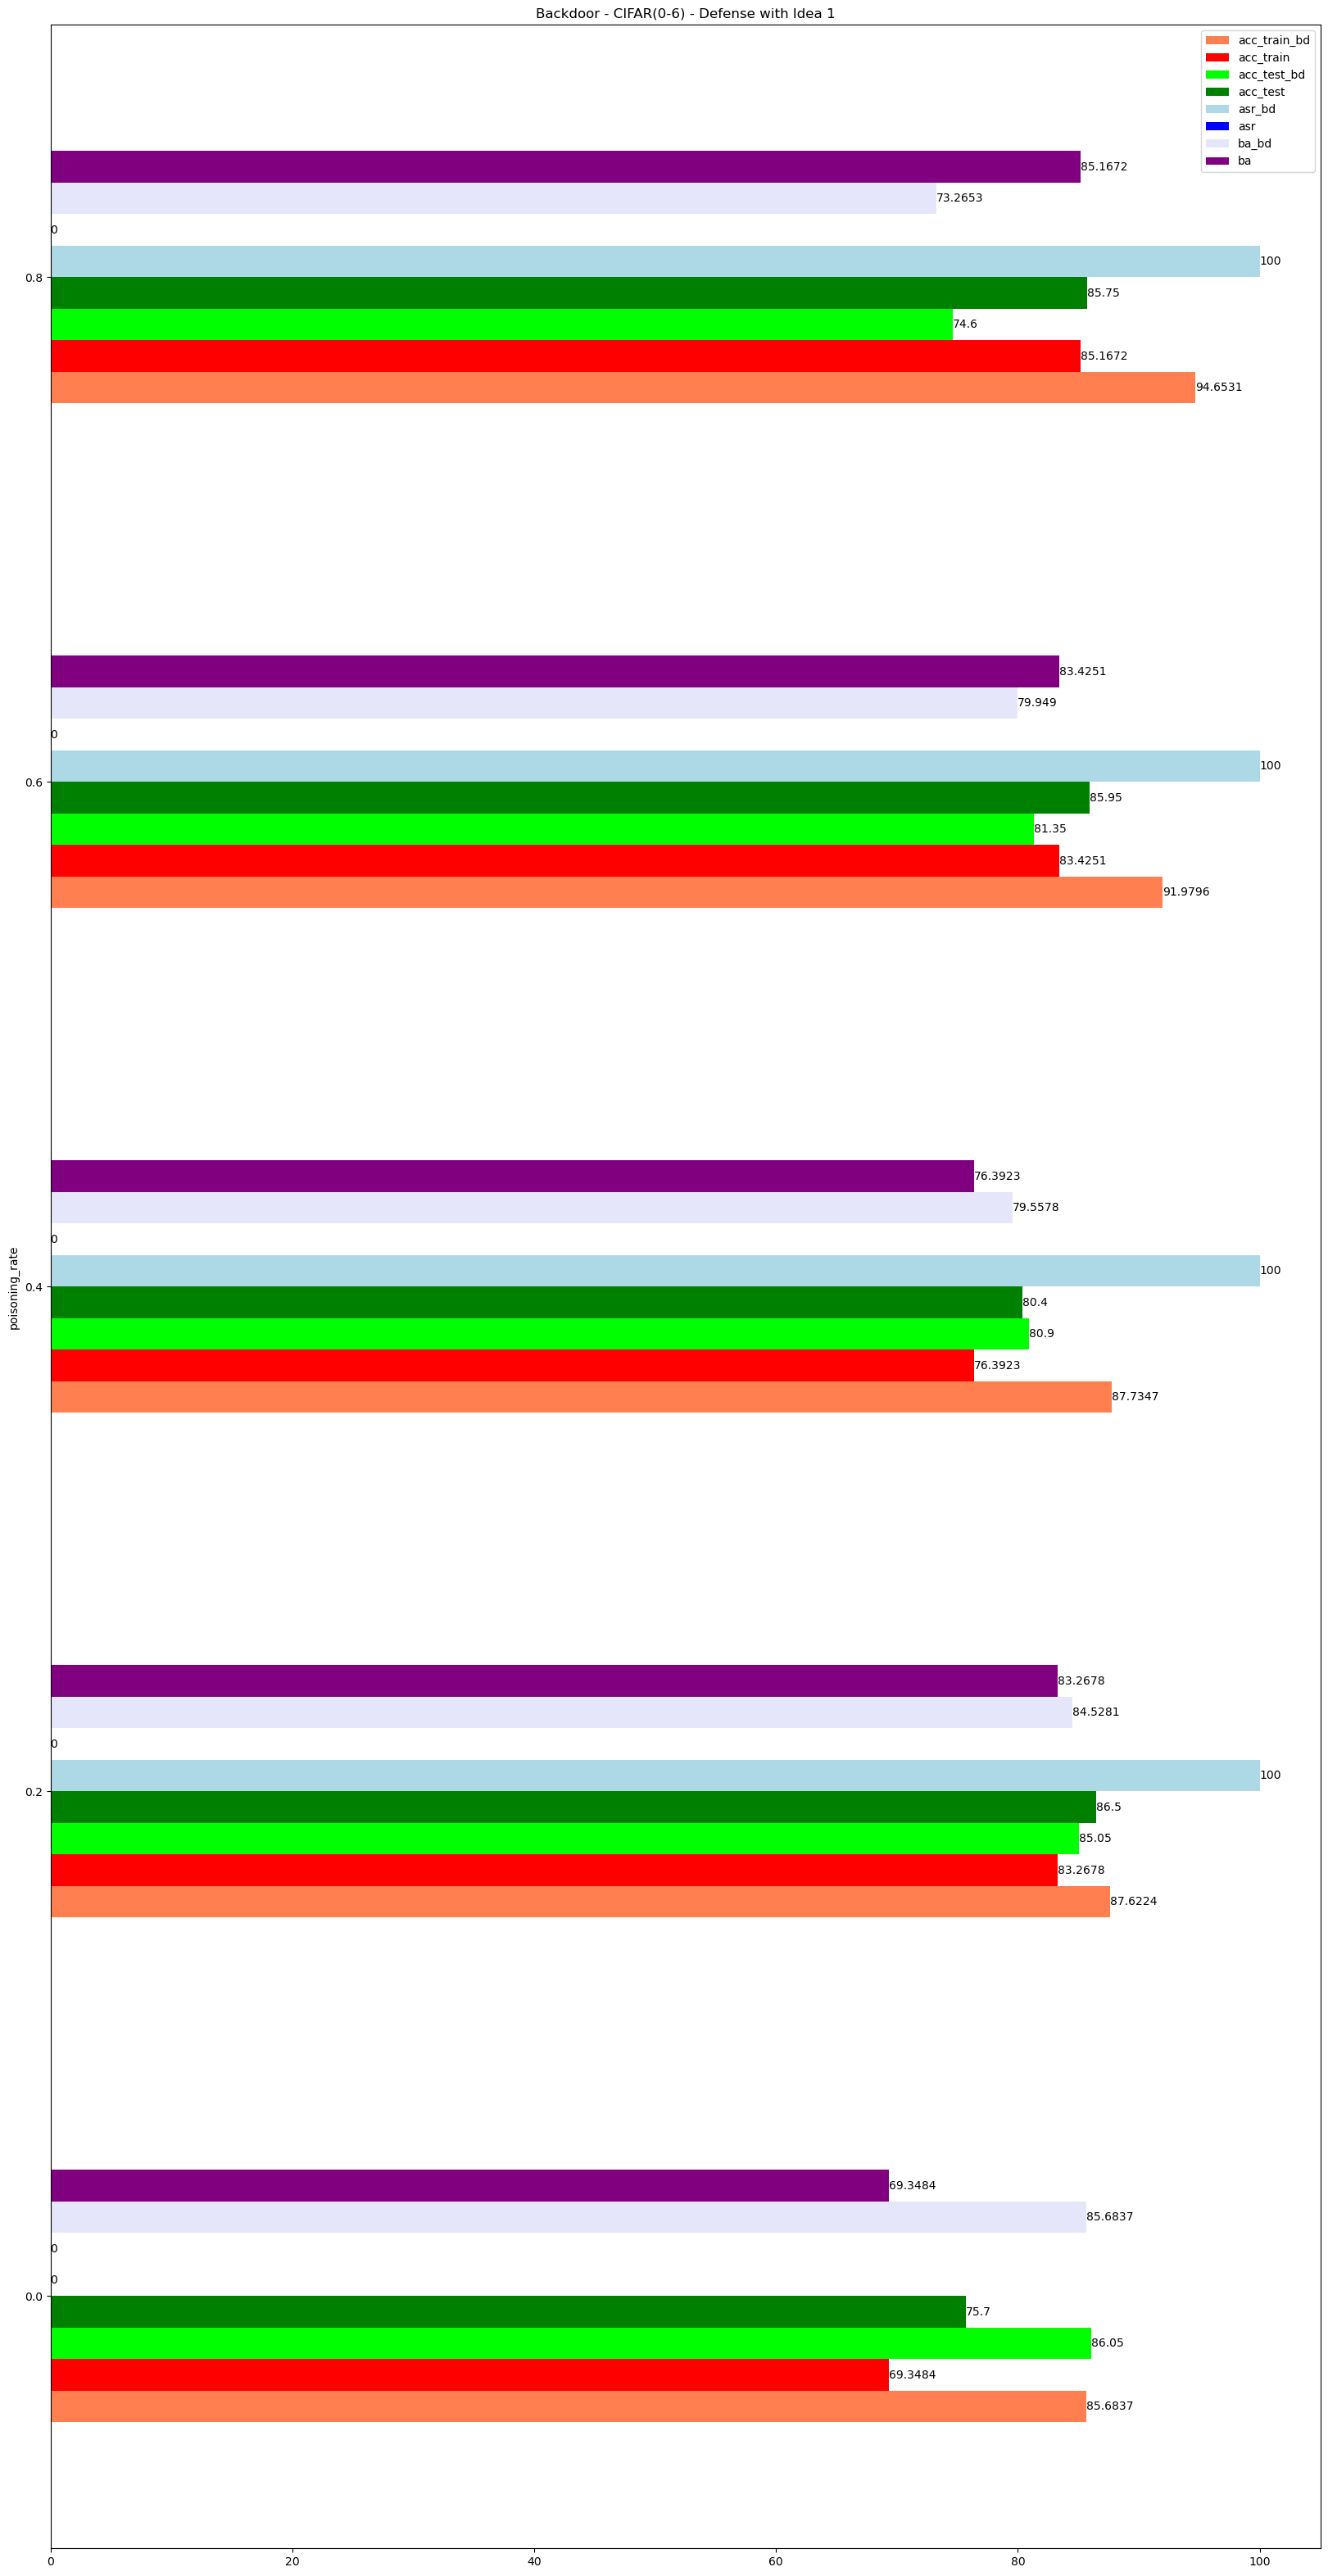

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 40]
ax = df.plot(kind='barh', x='poisoning_rate', y=['acc_train_bd','acc_train','acc_test_bd','acc_test','asr_bd','asr','ba_bd','ba'],
                 title=title, color=['coral','red','lime','green','lightblue','blue','lavender','purple','yellow','gold'])
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(root_path+'experiments/Visualize/'+exp_id+'/'+title+'.jpg', dpi=300)

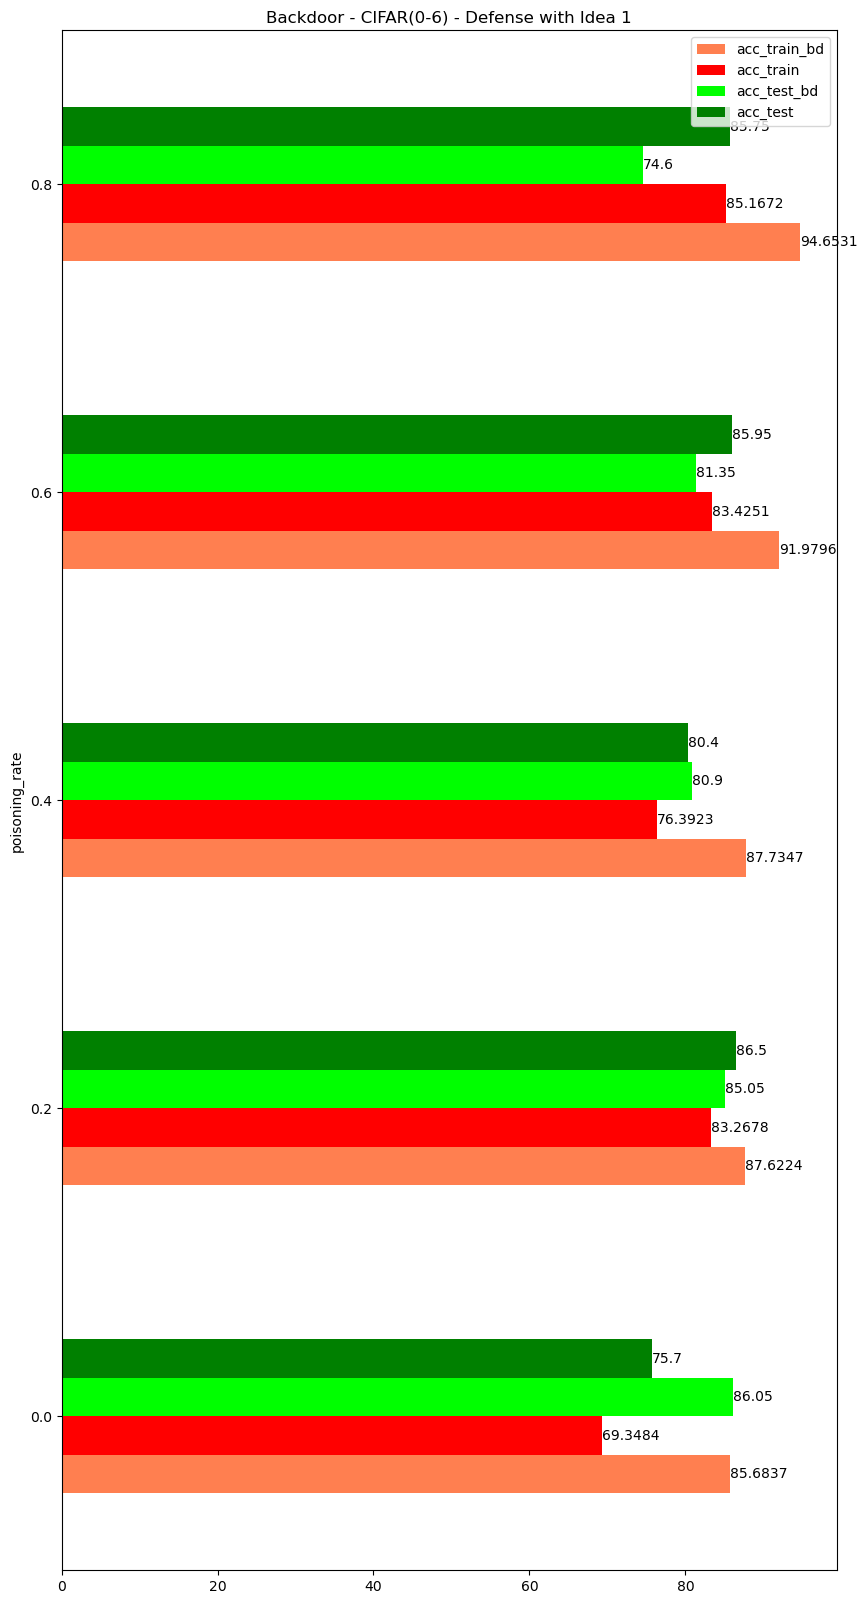

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 20]
ax = df.plot(kind='barh', x='poisoning_rate', y=['acc_train_bd','acc_train','acc_test_bd','acc_test'],
                 title=title, color=['coral','red','lime','green'])
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(root_path+'experiments/Visualize/'+exp_id+'/'+title+'.jpg', dpi=300)

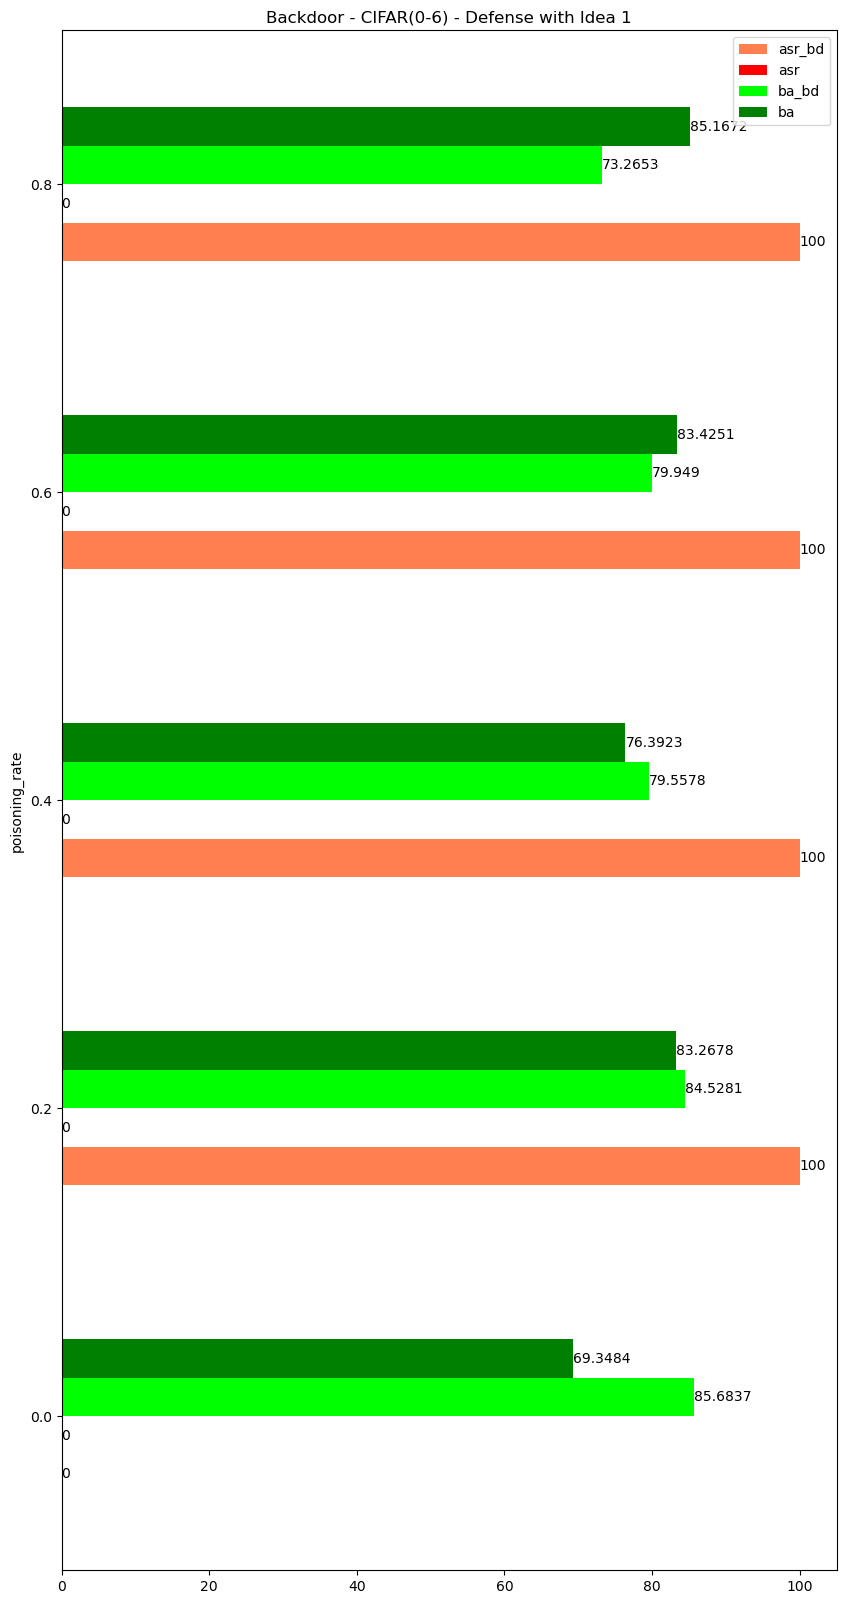

In [25]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 20]
ax = df.plot(kind='barh', x='poisoning_rate', y=['asr_bd','asr','ba_bd','ba'],
                 title=title, color=['coral','red','lime','green'])
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(root_path+'experiments/Visualize/'+exp_id+'/'+title+'.jpg', dpi=300)

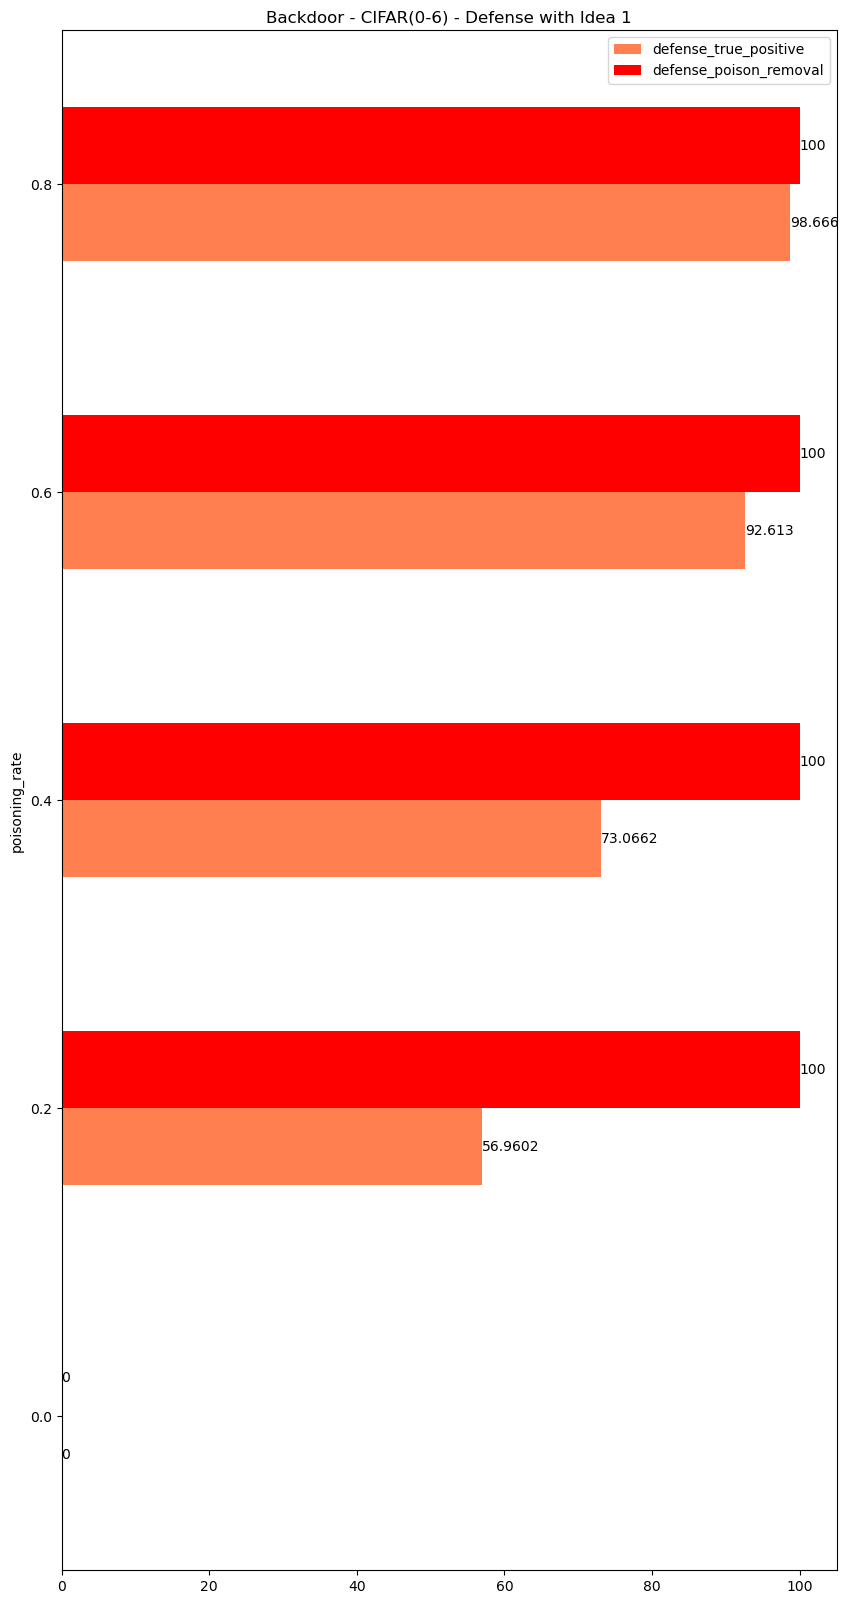

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 20]
ax = df.plot(kind='barh', x='poisoning_rate', y=['defense_true_positive','defense_poison_removal'],
                 title=title, color=['coral','red'])
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(root_path+'experiments/Visualize/'+exp_id+'/'+title+'.jpg', dpi=300)

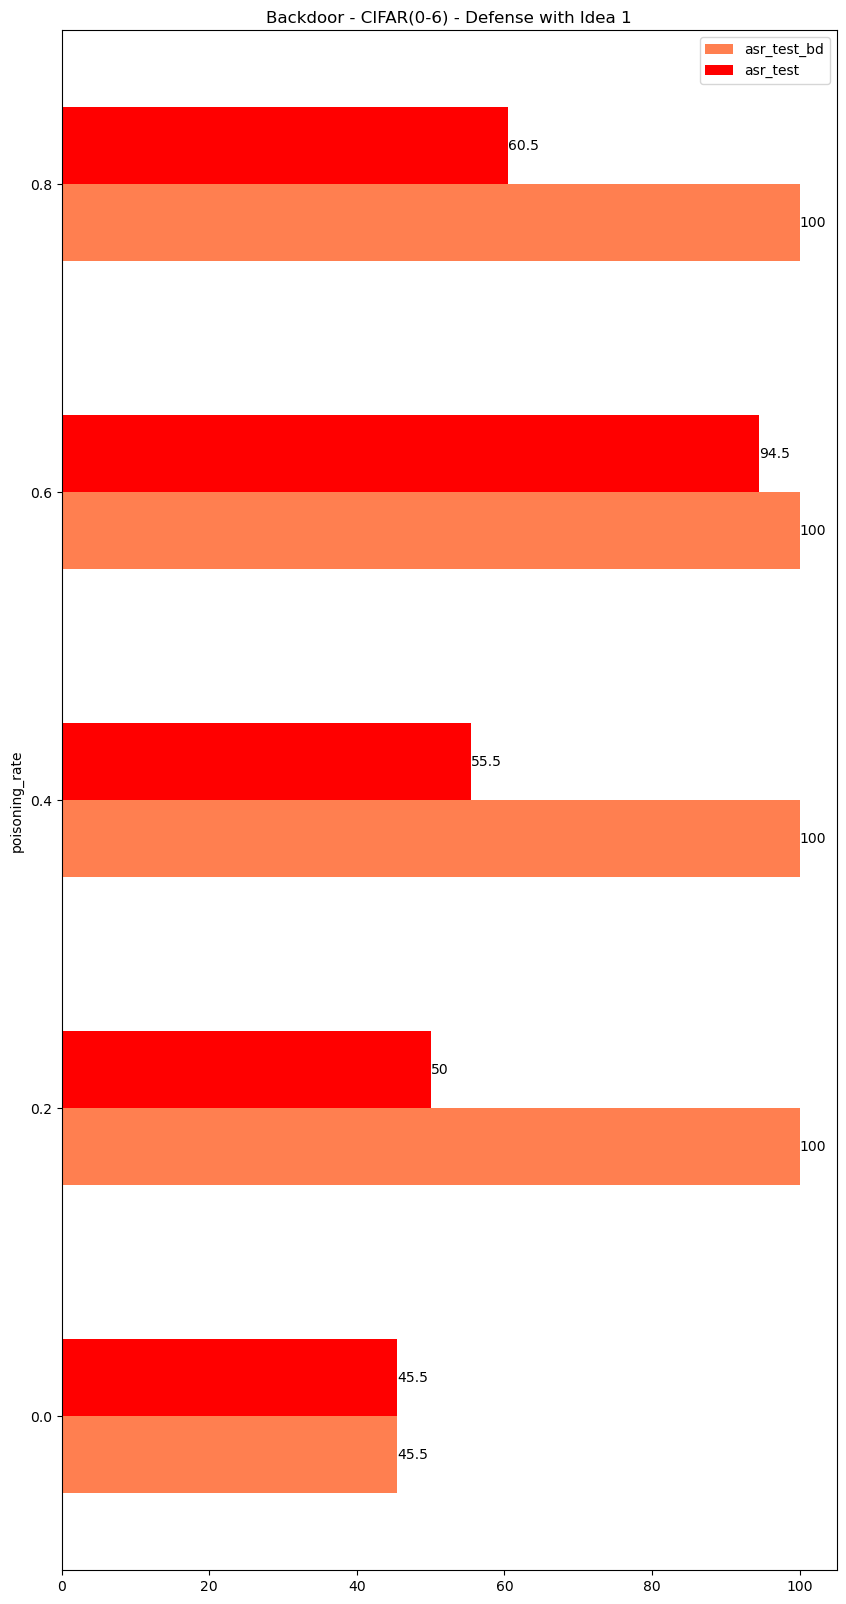

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 20]
ax = df.plot(kind='barh', x='poisoning_rate', y=['asr_test_bd','asr_test'],
                 title=title, color=['coral','red'])
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(root_path+'experiments/Visualize/'+exp_id+'/'+title+'.jpg', dpi=300)